# Time Series Forecasting for Energy Consumption

## Types of Time Series Data
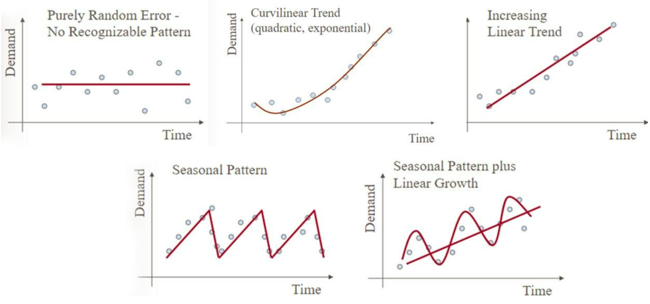

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as sc
import statistics as st
import plotly.express as px
from datetime import date

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('D:\Paractical data scientist\energy conce\PJME_hourly.csv',
                index_col=[0],
                parse_dates=[0])
# df = pd.DataFrame(df, columns=['Datetime', 'PJME_MW'])
# df['Datetime'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.set_index('Datetime')

In [ ]:
df['PJME_MW'].plot(style='.',figsize=(15, 5),color=color_pal[0],title='PJME Energy Use in MW')
plt.show()

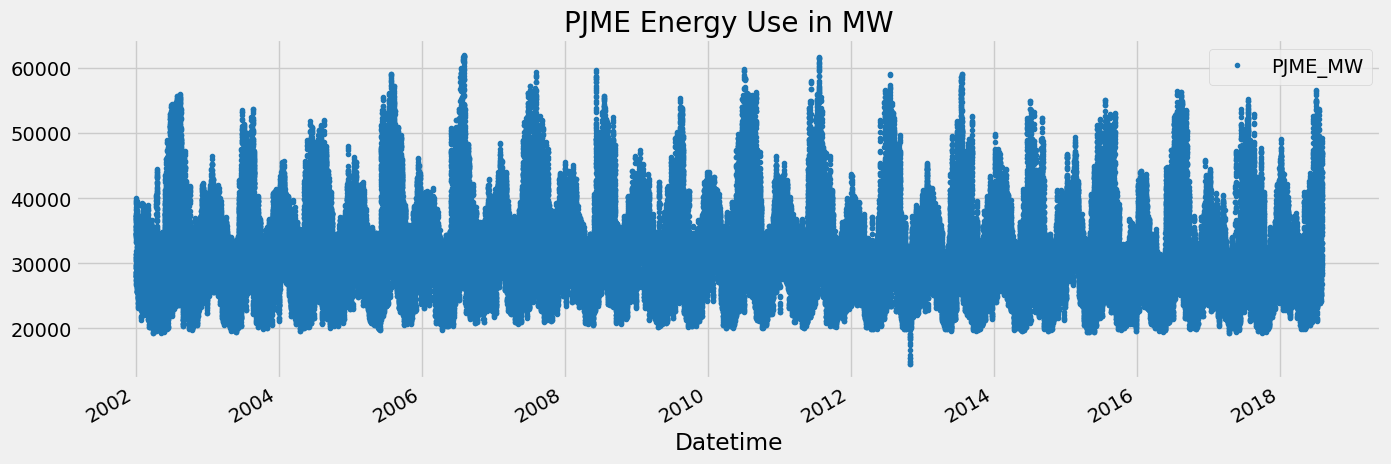

In [ ]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

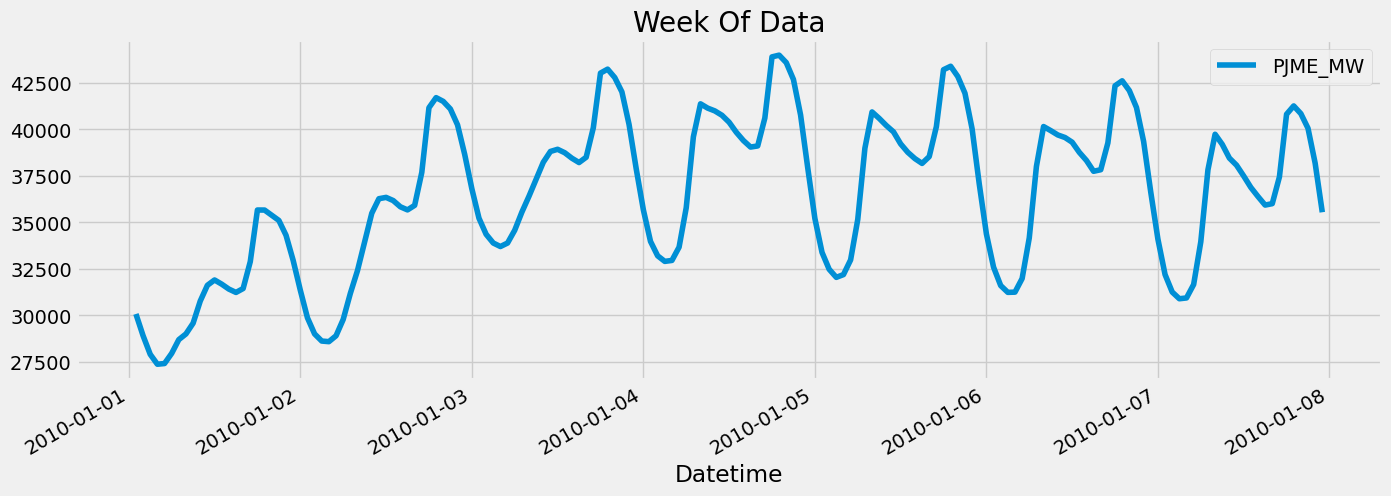

# Feature Creation

In [ ]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday','Tuesday','Wednesday','Thursday',
                                        'Friday','Saturday','Sunday'],ordered=True)

def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    df['date_offset'] = (df.date.dt.month*100 + df.date.dt.day - 320)%1300
    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], labels=['Spring', 'Summer', 'Fall', 'Winter'])
    
    X = df[['hour','dayofweek','quarter','month','year','dayofyear','dayofmonth',
        'weekofyear','weekday','season']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(df, label='PJME_MW')
df = pd.concat([X, y], axis=1)

In [ ]:
#=========================== month distribution
monthly_sum = df.groupby('month')['PJME_MW'].sum().reset_index()
monthly_sum.columns = ['month', 'count']
fig = px.bar(monthly_sum, x='month', y="count", orientation='v', title="MW month of the year", width=900, height=600)
fig.show()
#=========================== 
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJME_MW', palette='Blues')
ax.set_title('MW by Month')
plt.show()

In [ ]:
#=========================== hourly distribution
monthly_sum = df.groupby('hour')['PJME_MW'].sum().reset_index()
monthly_sum.columns = ['hour', 'count']
fig = px.bar(monthly_sum, x='hour', y="count", orientation='v', title="MW hourly of the year", width=900, height=600)
fig.show()
#=========================== 
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW by Hour')
plt.show()

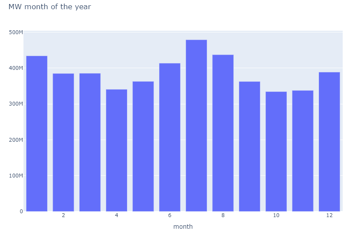 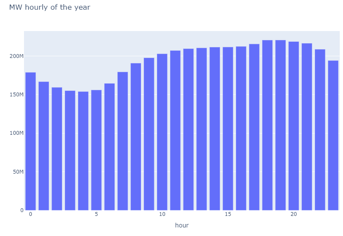

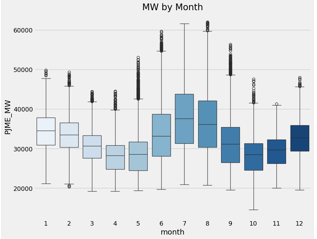 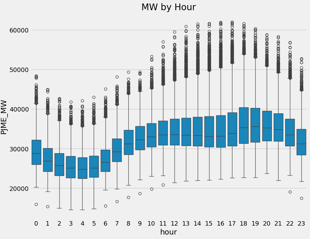

In [ ]:
#=========================== yearly distribution
year = df.groupby('year')['PJME_MW'].sum().reset_index()
year.columns = ['year', 'count']
fig = px.bar(year, x='year', y="count", orientation='v', title="MW of the year", width=900, height=600)
fig.show()
#===========================
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='year', y='PJME_MW', palette='Blues')
ax.set_title('MW by year')
plt.show()

In [ ]:
#=========================== dayofweek distribution
dayofweek = df.groupby('dayofweek')['PJME_MW'].sum().reset_index()
dayofweek.columns = ['dayofweek', 'count']
fig = px.bar(dayofweek, x='dayofweek', y="count", orientation='v', title="MW ay of the week", width=900, height=600)
fig.show()
#===========================
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dayofweek', y='PJME_MW', palette='Blues')
ax.set_title('MW by dayofweek')
plt.show()

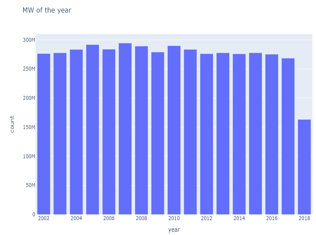  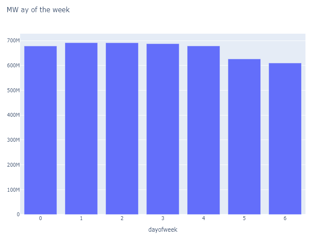

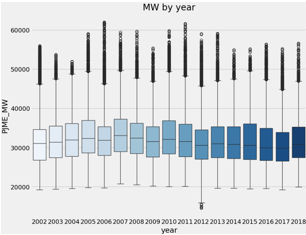  

In [ ]:
#=========================== weekly distribution of year
weekofyear = df.groupby('weekofyear')['PJME_MW'].sum().reset_index()
weekofyear.columns = ['weekofyear', 'count']
fig = px.bar(weekofyear, x='weekofyear', y="count", orientation='v', title="MW weekly of the year", width=900, height=600)
fig.show()

In [ ]:
#=========================== day distribution of month
dayofmonth = df.groupby('dayofmonth')['PJME_MW'].sum().reset_index()
dayofmonth.columns = ['dayofmonth', 'count']
fig = px.bar(dayofmonth, x='dayofmonth', y="count", orientation='v', title="MW dayofmonth of the year", width=900, height=600)
fig.show()

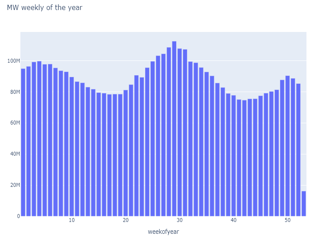  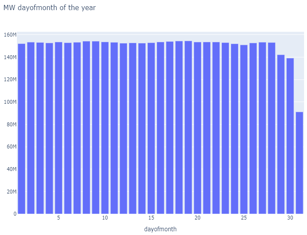

In [ ]:
#=========================== day distribution of year
dayofyear = df.groupby('dayofyear')['PJME_MW'].sum().reset_index()
dayofyear.columns = ['dayofyear', 'count']
fig = px.bar(dayofyear, x='dayofyear', y="count", orientation='v', title="MW dayofyear of the year", width=900, height=600)
fig.show()

In [ ]:
#=========================== quarter distribution of year
quarter = df.groupby('quarter')['PJME_MW'].sum().reset_index()
quarter.columns = ['quarter', 'count']
fig = px.bar(quarter, x='quarter', y="count", orientation='v', title="MW quarter of the year", width=900, height=600)
fig.show()
#===========================
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='quarter', y='PJME_MW', palette='Blues')
ax.set_title('MW by quarter')
plt.show()

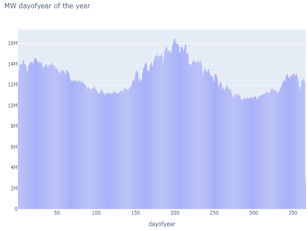  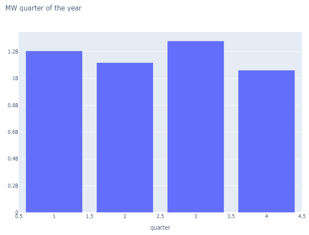

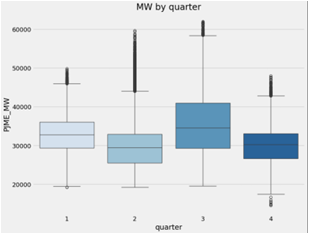

In [ ]:
# Ensuite, vous pouvez utiliser la fonction loc normalement
df['PJME_MW'].resample('M').mean().plot(figsize=(9, 6), title='Monthly Mean of MW')
plt.show()

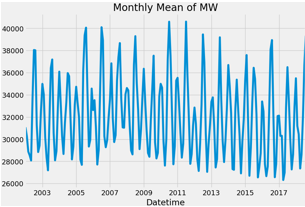

In [ ]:
# Ensuite, vous pouvez utiliser la fonction loc normalement
df.loc['2005','PJME_MW'].resample('W').mean().plot(figsize=(9, 6), title='Monthly Mean of MW')
plt.show()

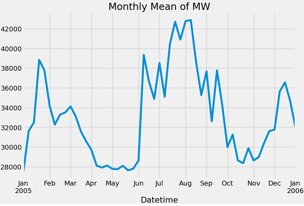

In [ ]:
# =================================== Aggregate
m = df['PJME_MW'].resample('W').agg(['mean', 'std', 'min', 'max'])
plt.figure(figsize=(12, 8))
m['mean'].plot(figsize=(9, 6),label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')
plt.legend()
plt.show()

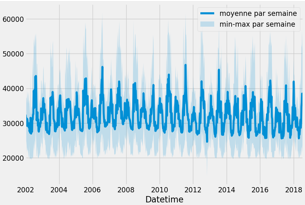

In [ ]:
# ==================================== Moving Average et EWM
plt.figure(figsize=(12, 8))
df['PJME_MW']['2004-08'].plot()
df['PJME_MW']['2004-08'].rolling(window=7).mean().plot(label='non centre', lw=3, ls=':', alpha=0.8)
df['PJME_MW']['2004-08'].rolling(window=7, center=True).mean().plot(label='centre', lw=3, ls=':', alpha=0.8)
df['PJME_MW']['2004-08'].ewm(alpha=0.6).mean().plot(label='ewm', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

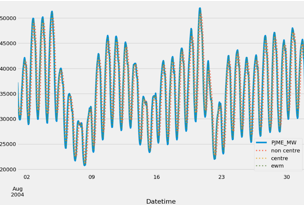

In [ ]:
df['hour'].loc['2002-08'].plot(figsize=(9, 6))
plt.show()

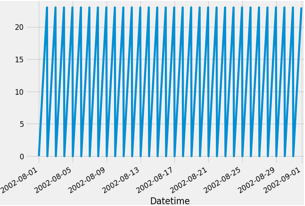

In [ ]:
# =============================
df['N_Time'] = pd.to_numeric(df['hour'])
df['N_Time'].plot(figsize=(9, 6))
df.resample('M').count().plot(y='N_Time', figsize=(9, 6))
plt.show()

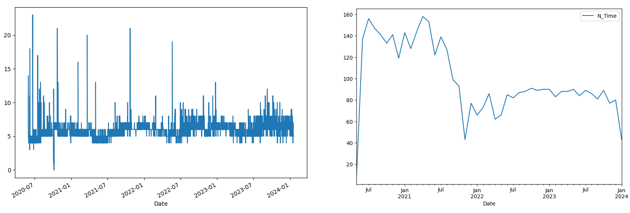

C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_2304\3086422801.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



<Axes: xlabel='Date'>

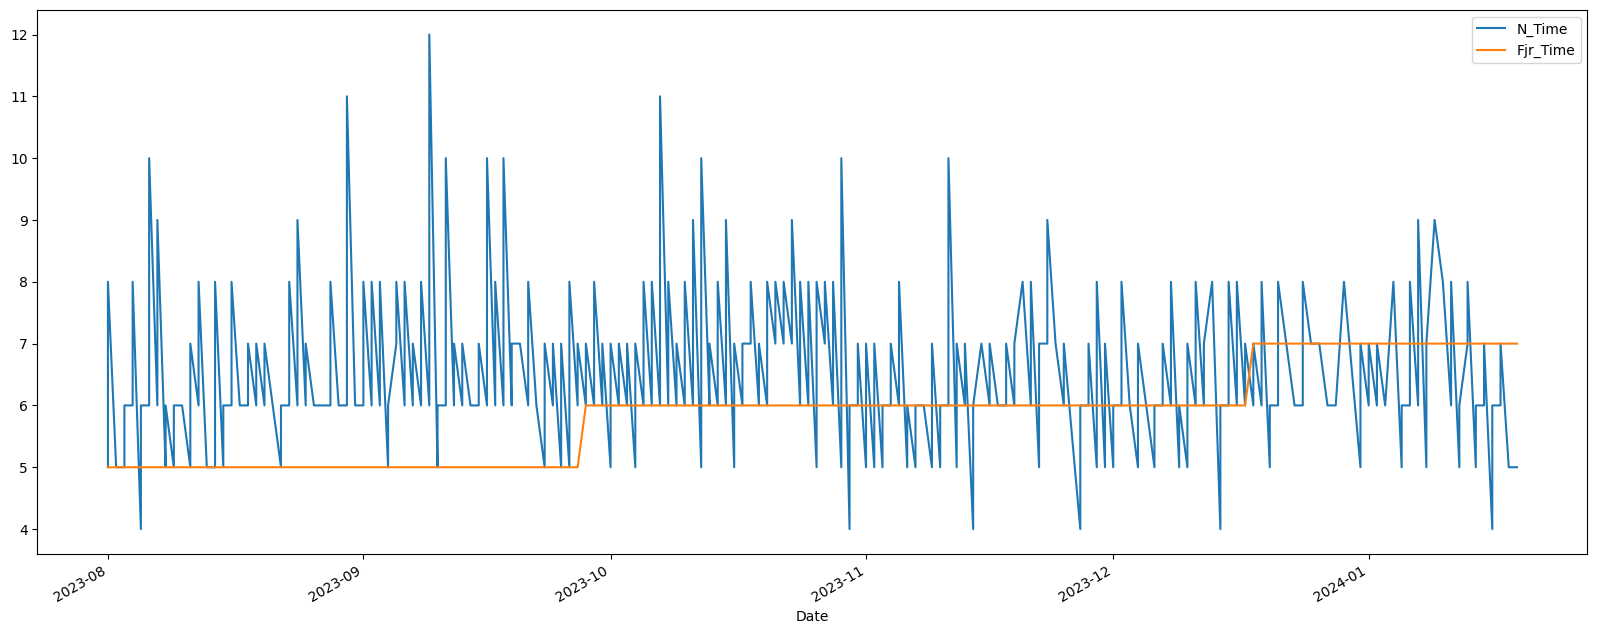

In [73]:
# ==================================== Comparaison de 2 série temporelles
Fjr = pd.read_csv('D:\Paractical data scientist\Time seris\Real.csv', delimiter=';', parse_dates=['Date'], dayfirst=True)
Fjr.set_index('Date', inplace=True)
Fjr['Fjr_hour'] = pd.to_datetime(Fjr['Time2']).dt.hour
Fjr['Fjr_Time'] = pd.to_numeric(Fjr['Fjr_hour'])

data = pd.merge(df, Fjr, on='Date', how='inner', suffixes=('_real', '_fjr'))
data.head()

# data[['N_Time', 'Fjr_Time']].plot(subplots=True, figsize=(12, 8))
data[['N_Time', 'Fjr_Time']].plot( figsize=(20, 8))

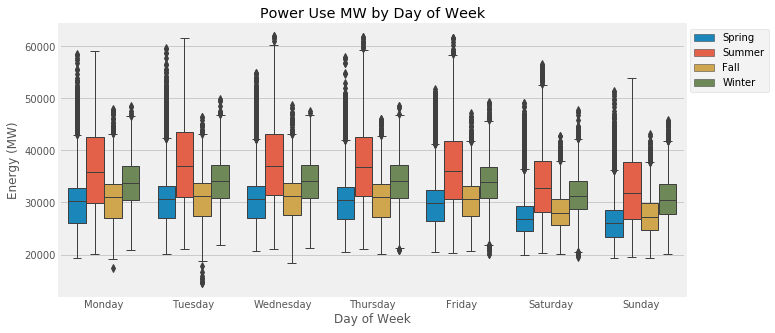

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df.dropna(),x='weekday',y='PJME_MW',
            hue='season',ax=ax,linewidth=1)
ax.set_title('Power Use MW by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Energy (MW)')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Train / Test Split

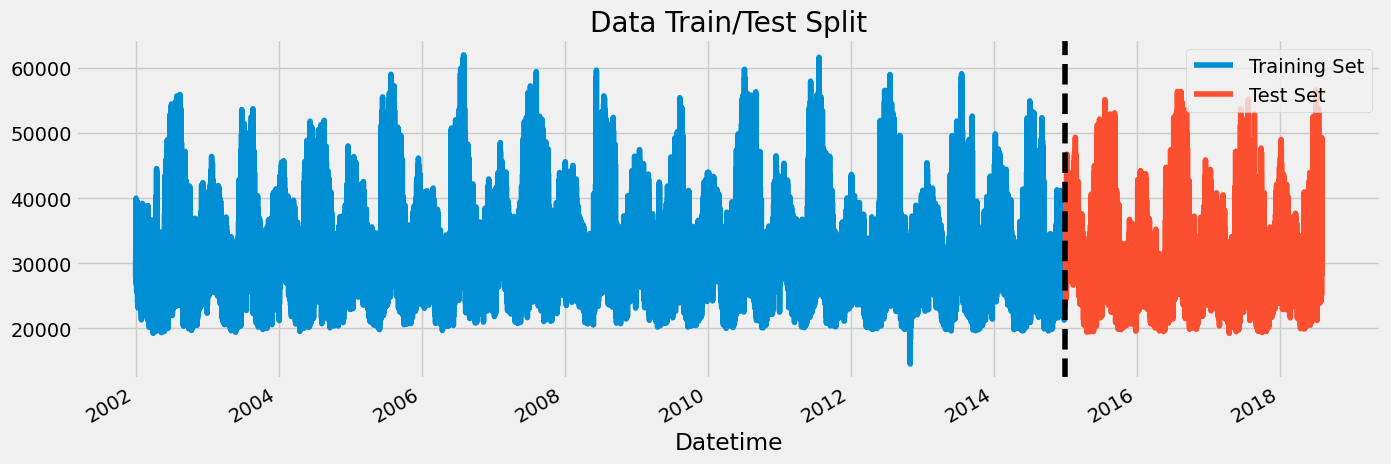

In [ ]:
df_train = df.loc[df.index < '01-01-2015']
df_test = df.loc[df.index >= '01-01-2015']

fig, ax = plt.subplots(figsize=(15, 5))
df_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
df_test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

# Create our Model xgboost

In [ ]:
train = create_features(df_train)
test = create_features(df_test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'PJME_MW'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
import xgboost as xgb

reg = xgb.XGBRegressor()
reg.fit(X_train, y_train)

### Compare Forecast to Actuals

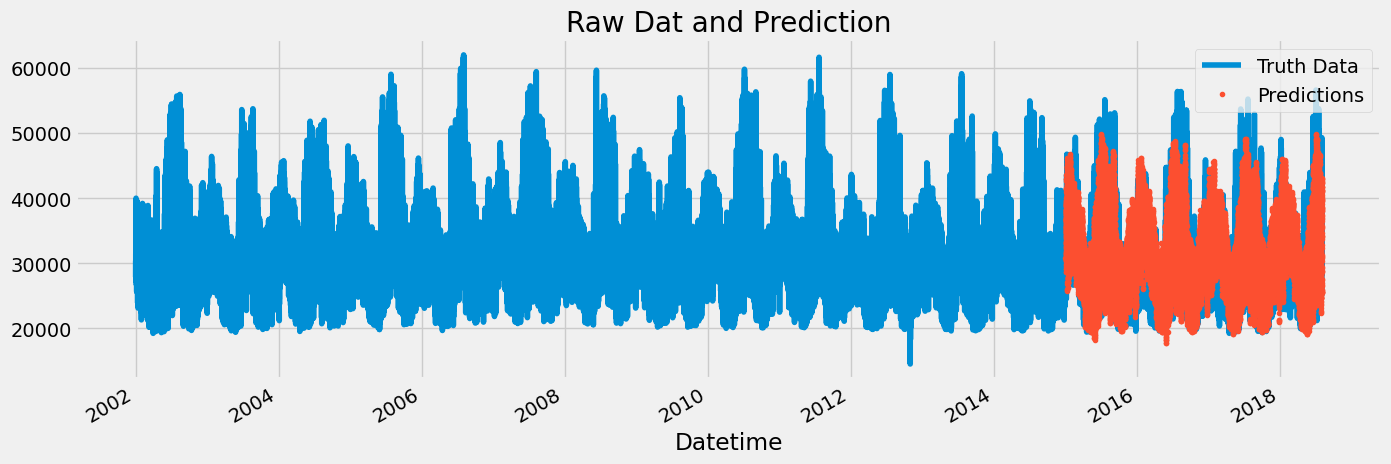

In [ ]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['PJME_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

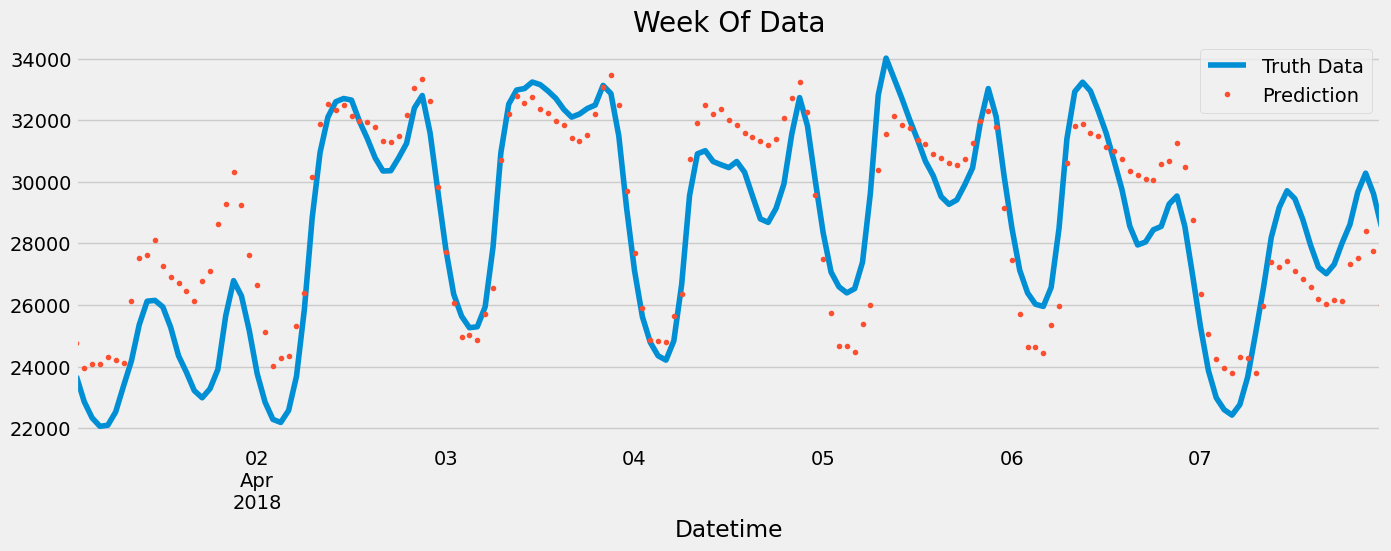

In [ ]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

### Score (RMSE)

In [ ]:
from sklearn.metrics import mean_squared_error

score = np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 4193.16


# Create our Model Prophet

- Prophet model expects the dataset to be named a specific way. We will rename our dataframe columns before feeding it into the model.
    - Datetime column named: `ds`
    - target : `y`

In [ ]:
from prophet import Prophet
# Format data for prophet model using ds and y
pjme_train_prophet = df_train.reset_index().rename(columns={'Datetime':'ds','PJME_MW':'y'})

In [ ]:
%%time
model = Prophet()
model.fit(pjme_train_prophet)

CPU times: user 3min 47s, sys: 711 ms, total: 3min 48s
Wall time: 3min 48s


In [ ]:
# Predict on test set with model
pjme_test_prophet = df_test.reset_index().rename(columns={'Datetime':'ds','PJME_MW':'y'})
pjme_test_fcst = model.predict(pjme_test_prophet)

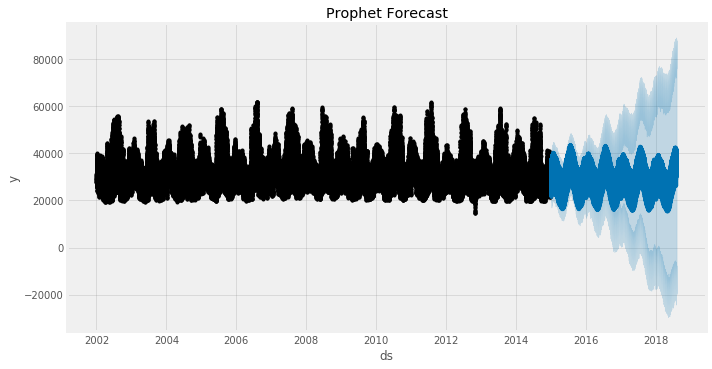

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(pjme_test_fcst, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

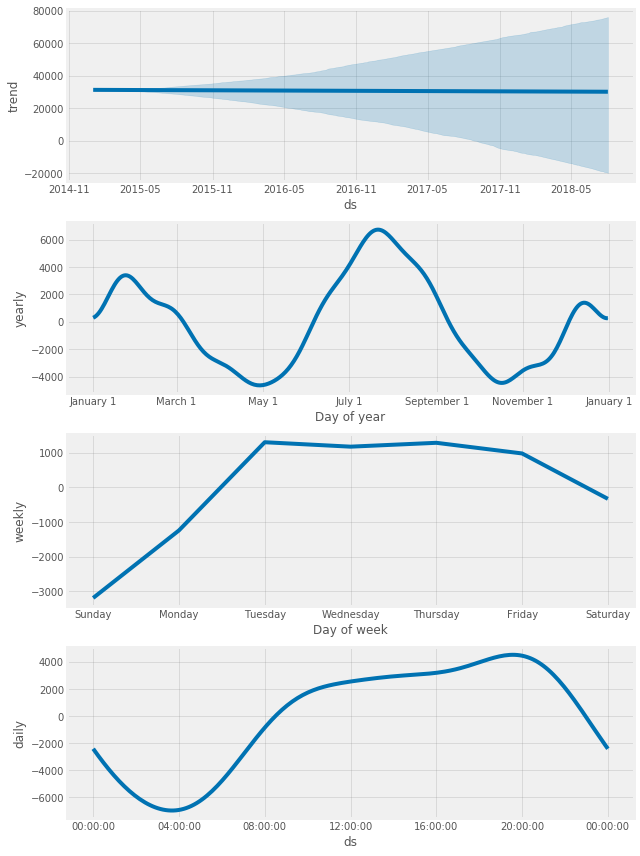

In [ ]:
fig = model.plot_components(pjme_test_fcst)
plt.show()

### Compare Forecast to Actuals

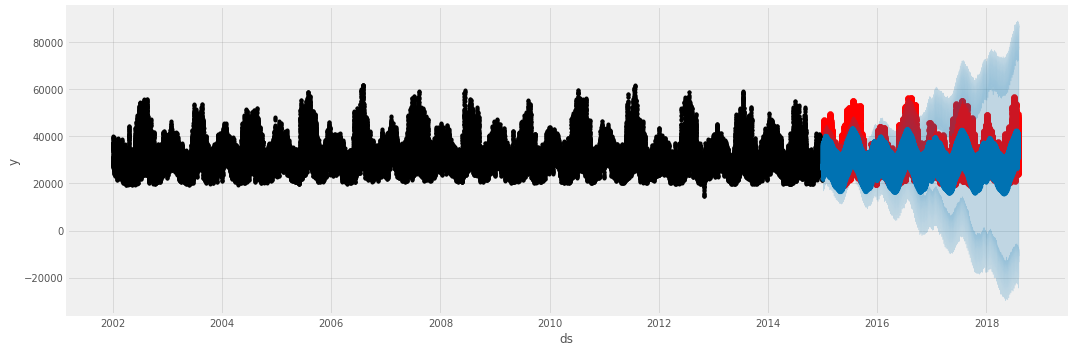

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(df_test.index, df_test['PJME_MW'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)

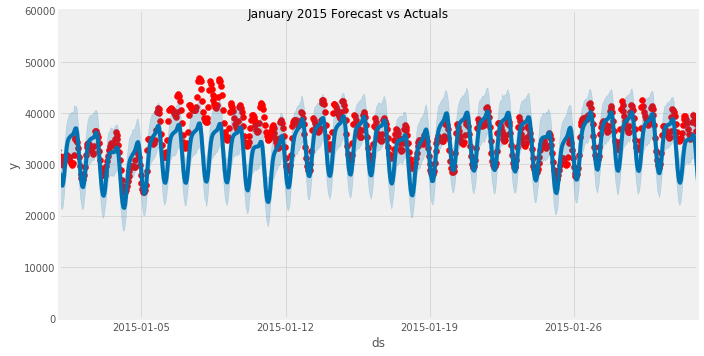

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_test.index, df_test['PJME_MW'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)
ax.set_xbound(lower='01-01-2015',upper='02-01-2015')
ax.set_ylim(0, 60000)
plot = plt.suptitle('January 2015 Forecast vs Actuals')

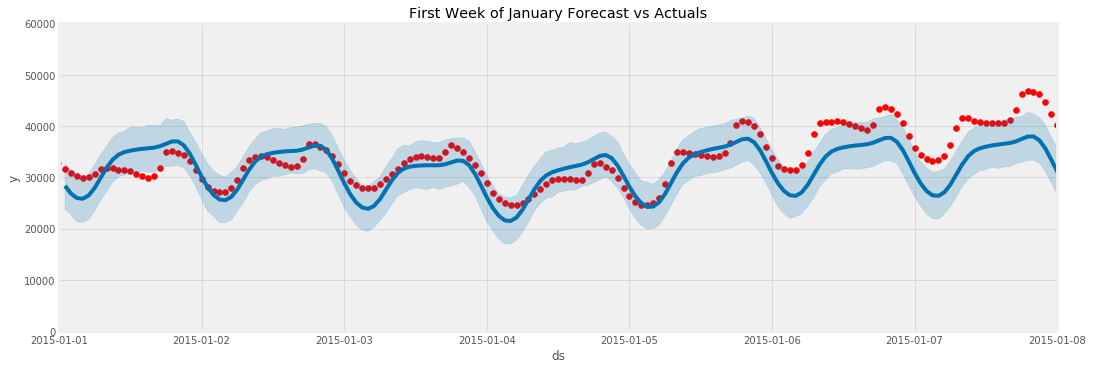

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(df_test.index, df_test['PJME_MW'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)
ax.set_xbound(lower='01-01-2015', upper='01-08-2015')
ax.set_ylim(0, 60000)
ax.set_title('First Week of January Forecast vs Actuals')
plt.show()

### Score (RMSE)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

np.sqrt(mean_squared_error(y_true=df_test['PJME_MW'],y_pred=pjme_test_fcst['yhat']))
mean_absolute_error(y_true=df_test['PJME_MW'],y_pred=pjme_test_fcst['yhat'])

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

score = mean_absolute_percentage_error(y_true=df_test['PJME_MW'],y_pred=pjme_test_fcst['yhat'])

# Create our Model Prophet

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

WINDOW_SIZE = 5
X1, y1 = df_to_X_y(df['PJME_MW'], WINDOW_SIZE)
X1.shape, y1.shape
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]
# ((70086, 5, 1), (70086,))

In [ ]:
X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape
# ((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [ ]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()
# Model: "sequential"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
# =================================================================
#  lstm (LSTM)                 (None, 64)                16896     
#  dense (Dense)               (None, 8)                 520       
#  dense_1 (Dense)             (None, 1)                 9         
# =================================================================
# Total params: 17425 (68.07 KB)
# Trainable params: 17425 (68.07 KB)
# Non-trainable params: 0 (0.00 Byte)
# _________________________________________________________________

In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])
# Epoch 1/10
# 1875/1875 [==============================] - 10s 4ms/step - loss: 21.6310 - root_mean_squared_error: 4.6509 - val_loss: 1.2740 - val_root_mean_squared_error: 1.1287
# Epoch 2/10
# 1875/1875 [==============================] - 8s 4ms/step - loss: 1.9370 - root_mean_squared_error: 1.3918 - val_loss: 0.6466 - val_root_mean_squared_error: 0.8041
# Epoch 3/10
# 1875/1875 [==============================] - 8s 4ms/step - loss: 0.9283 - root_mean_squared_error: 0.9635 - val_loss: 0.5312 - val_root_mean_squared_error: 0.7288
# Epoch 4/10
# 1875/1875 [==============================] - 8s 4ms/step - loss: 0.7425 - root_mean_squared_error: 0.8617 - val_loss: 0.5151 - val_root_mean_squared_error: 0.7177
# Epoch 5/10
# 1875/1875 [==============================] - 7s 4ms/step - loss: 0.6938 - root_mean_squared_error: 0.8330 - val_loss: 0.5069 - val_root_mean_squared_error: 0.7119
# Epoch 6/10
# 1875/1875 [==============================] - 8s 4ms/step - loss: 0.6749 - root_mean_squared_error: 0.8215 - val_loss: 0.5025 - val_root_mean_squared_error: 0.7089
# Epoch 7/10
# 1875/1875 [==============================] - 5s 3ms/step - loss: 0.6653 - root_mean_squared_error: 0.8156 - val_loss: 0.5040 - val_root_mean_squared_error: 0.7099
# Epoch 8/10
# 1875/1875 [==============================] - 8s 4ms/step - loss: 0.6583 - root_mean_squared_error: 0.8114 - val_loss: 0.4973 - val_root_mean_squared_error: 0.7052
# Epoch 9/10
# 1875/1875 [==============================] - 5s 3ms/step - loss: 0.6545 - root_mean_squared_error: 0.8090 - val_loss: 0.4978 - val_root_mean_squared_error: 0.7055
# Epoch 10/10
# 1875/1875 [==============================] - 5s 3ms/step - loss: 0.6499 - root_mean_squared_error: 0.8062 - val_loss: 0.4979 - val_root_mean_squared_error: 0.7056
# <keras.src.callbacks.History at 0x7aa0c892b850>

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results
# 1875/1875 [==============================] - 3s 1ms/step
# Train Predictions	Actuals
# 0	-9.907809	-9.67
# 1	-9.765495	-9.17
# 2	-8.863177	-8.10
# 3	-7.333381	-7.66
# 4	-7.246589	-7.04
# ...	...	...
# 59995	6.013978	6.07
# 59996	7.145104	9.88
# 59997	12.200861	13.53
# 59998	16.214775	15.43
# 59999	16.465298	15.54
# 60000 rows × 2 columns

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

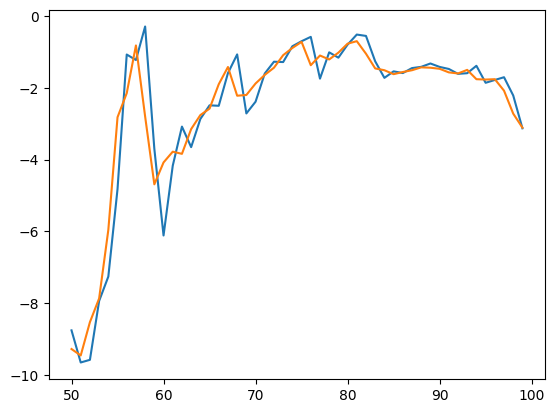

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results
# 157/157 [==============================] - 1s 2ms/step
# Val Predictions	Actuals
# 0	15.454316	14.02
# 1	13.269004	13.67
# 2	13.176702	12.27
# 3	11.649117	11.19
# 4	10.519583	10.85
# ...	...	...
# 4995	17.267324	18.27
# 4996	17.428043	17.85
# 4997	17.252424	16.65
# 4998	15.910147	15.85
# 4999	15.158935	15.09
# 5000 rows × 2 columns

In [ ]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

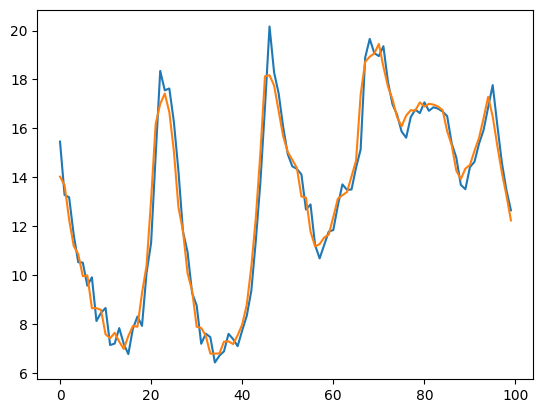

In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results
# 159/159 [==============================] - 0s 1ms/step
# Test Predictions	Actuals
# 0	14.500319	13.99
# 1	13.363221	13.46
# 2	12.977729	12.93
# 3	12.579265	12.43
# 4	12.127918	12.17
# ...	...	...
# 5081	-1.080150	-0.98
# 5082	-1.455848	-1.40
# 5083	-1.649776	-2.75
# 5084	-3.312959	-2.89
# 5085	-3.172763	-3.93
# 5086 rows × 2 columns

In [ ]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

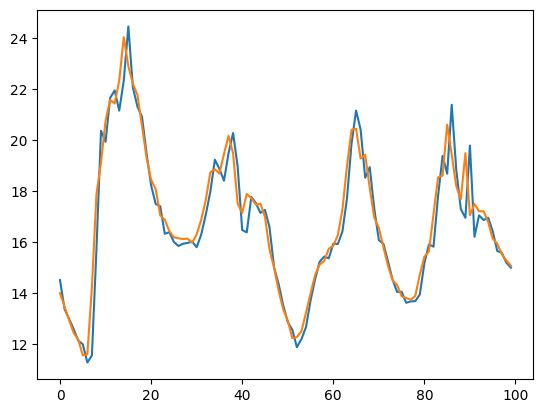

### Score (RMSE)

In [ ]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(predictions, y)

plot_predictions1(model1, X_test1, y_test1)
# 159/159 [==============================] - 0s 1ms/step
# (      Predictions  Actuals
#  0       14.500319    13.99
#  1       13.363221    13.46
#  2       12.977729    12.93
#  3       12.579265    12.43
#  4       12.127918    12.17
#  ...           ...      ...
#  5081    -1.080150    -0.98
#  5082    -1.455848    -1.40
#  5083    -1.649776    -2.75
#  5084    -3.312959    -2.89
#  5085    -3.172763    -3.93
 
#  [5086 rows x 2 columns],

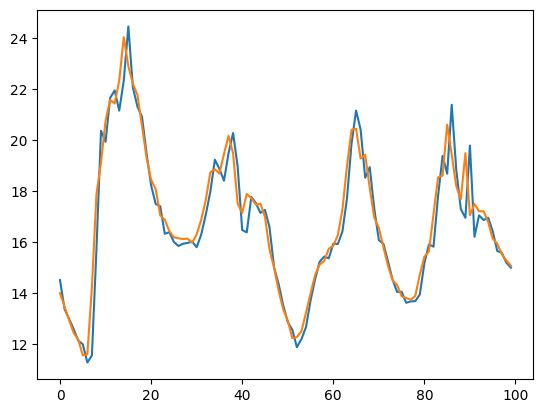

Text(0, 0.5, 'Count')

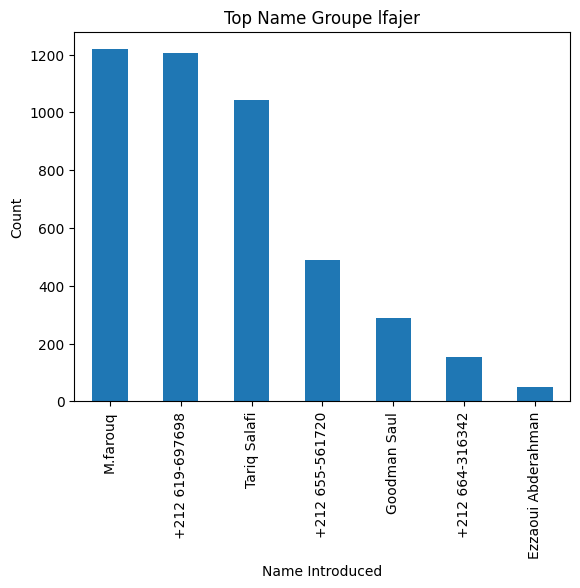

In [74]:
ax = df['Name'].value_counts().head(10).plot(kind='bar', title='Top Name Groupe lfajer')
ax.set_xlabel('Name Introduced')
ax.set_ylabel('Count')

C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_18664\4174620482.py:44: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_18664\4174620482.py:86: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_18664\4174620482.py:128: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



<Axes: xlabel='Date'>

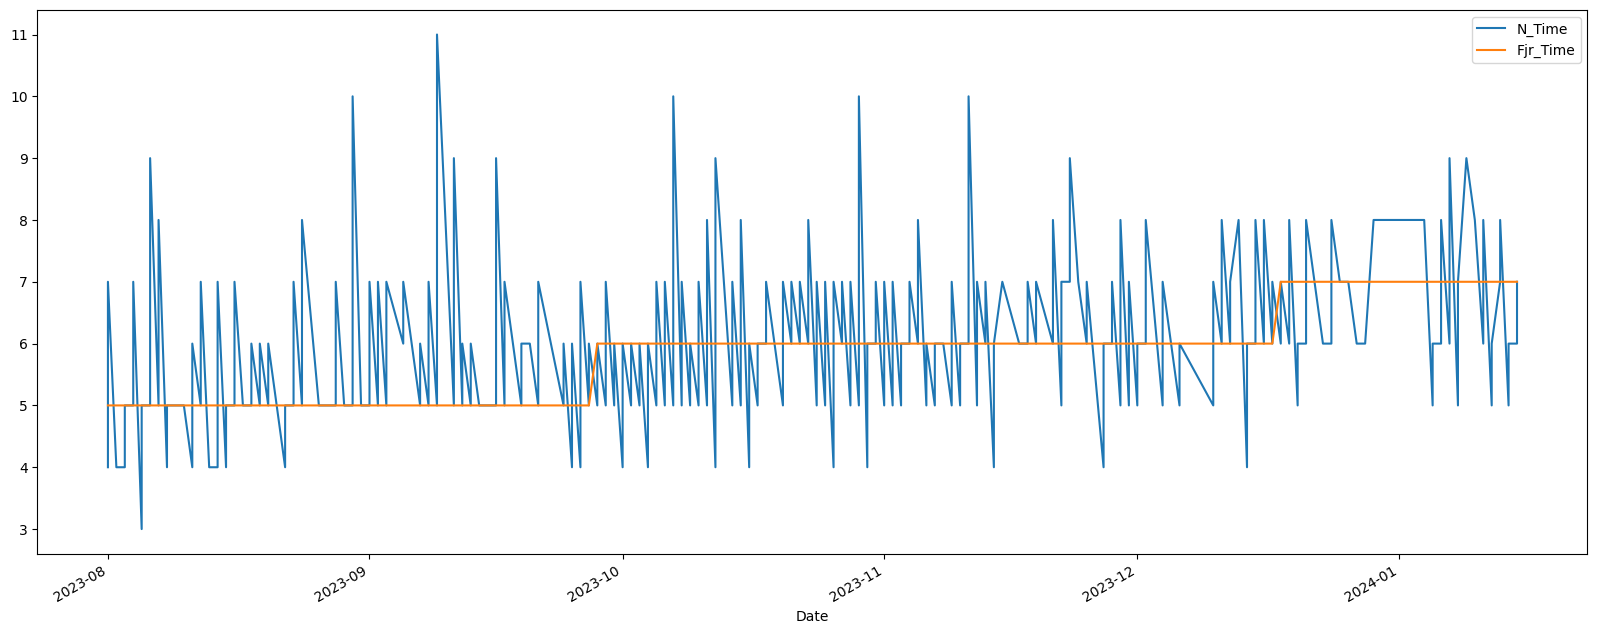

In [144]:
# from pushbullet import Pushbullet # pip install pushbullet.py
# # API KEY PushBullet (https://www.pushbullet.com/)
# API_KEY = "YOUR_API_KEY"
# # Get Link to Chatfile from Pushbullet
# pb = Pushbullet(API_KEY)
# pushes = pb.get_pushes()
# latest = pushes[0]

# # Download Chatfile
# url = latest['file_url']
file_path = "D:\Paractical data scientist\Time seris\chat.txt"
# urllib.request.urlretrieve(url, file_path)

# read file by lines
with open(file_path, mode='r', encoding="utf8") as f:
    data = f.readlines()

# FOUND ON GITHUB: https://gist.github.com/kwcooper/a21ba58272d3cdf26310cc02ee4b168f
# parse text, create list of lists structure & remove first whatsapp info message
dataset = data[1:]
cleaned_data = []
for line in dataset:
    # Check, whether it is a new line or not
    # If the following characters are in the line -> assumption it is NOT a new line
    if '/' in line and ':' in line and ',' in line and '-' in line:
        # grab the info and cut it out
        date = line.split(",")[0]
        line2 = line[len(date):]
        time = line2.split("-")[0][2:]
        line3 = line2[len(time):]
        name = line3.split(":")[0][4:]
        line4 = line3[len(name):]
        message = line4[6:-1] # strip newline charactor
        cleaned_data.append([date, time, name, message])

    # else, assumption -> new line. Append new line to previous 'message'
    else:
        new = cleaned_data[-1][-1] + " " + line
        cleaned_data[-1][-1] = new

# Create the DataFrame
df = pd.DataFrame(cleaned_data, columns=['Date', 'Time', 'Name', 'Message'])
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
# df['Time'] = pd.to_datetime(df['Time'])
# Set 'Date' column as the index
df.set_index('Date', inplace=True)
# ====================
rest_types_lessthan1000 = ['ðŸ‘\x8d', 'ðŸ‘\x8dðŸ\x8f»']
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'OK'
    else:
        return 'NOK'
df['Message'] = df['Message'].apply(handle_rest_type)
df['Message'].value_counts()

df.drop(df[df["Message"] == "NOK"].index, inplace=True)
# print(df)
# print(f'{"Message" :-<40} {df["Message"].unique()}')
# ============================
# df['Time'].plot(figsize=(9, 6))
# plt.show()
# ============================
# print(df.index)
# df.loc['2023-07-04':'2023-07-08','Time'].plot()
# =============================
# df['Time'] = pd.to_datetime(df['Time']).dt.hour
# median_time = df['Time'].median()
# print(f'Median Time for Time: {median_time}')
#=========================== month distribution
# ds = df.copy()
# ds['month'] = pd.to_datetime(df['Date']).dt.month
# ds = ds['month'].value_counts().reset_index()
# ds.columns = ['month', 'count']
# fig = px.bar(ds, x='month', y="count", orientation='v', title="Fajr month of the year", width=900, height=600)
# fig.show()
#=========================== Time distribution
# ds = df.copy()
# ds['hour'] = pd.to_datetime(df['Time']).dt.hour
# ds = ds['hour'].value_counts().reset_index()
# ds.columns = ['hour', 'count']
# fig = px.bar(ds, x='hour', y='count', orientation='v', title='Distribution Across Hours', width=900, height=600)
# fig.show()
#===========================
df['hour'] = pd.to_datetime(df['Time']).dt.hour
# df['hour'].plot()
# =============================
df['N_Time'] = pd.to_numeric(df['hour'])
# df['N_Time'].plot(figsize=(9, 6))
# df.resample('M').count().plot(y='N_Time', figsize=(9, 6))
# plt.show()
# =============================== Mean of the month & the week
# plt.figure(figsize=(12, 8))
# df['N_Time'].plot()
# df['N_Time'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
# df['N_Time'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
# plt.legend()
# plt.show()
# =============================== Mean of the month
# df['N_Time'].loc['2023'].resample('M').mean().plot(figsize=(9, 6), title='Monthly Mean of Time in 2023')
# df['N_Time'].resample('M').mean().plot(figsize=(9, 6), title='Monthly Mean of Time')
# plt.show()
# =================================
# df['N_Time'].resample('M').std().plot(figsize=(9, 6), title='Monthly std of Time')
# plt.show()
# =================================== Aggregate
# m = df['N_Time'].resample('W').agg(['mean', 'std', 'min', 'max'])
# plt.figure(figsize=(12, 8))
# m['mean']['2023'].plot(figsize=(9, 6),label='moyenne par semaine')
# plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')
# plt.legend()
# plt.show()
# ===================================
# df['N_Time'].resample('W').agg(['mean', 'std', 'min', 'max']).plot(figsize=(9, 6))
# plt.show()
# ==================================== Moving Average et EWM
# plt.figure(figsize=(12, 8))
# df['N_Time']['2023-08'].plot()
# df['N_Time']['2023-08'].rolling(window=7).mean().plot(label='non centre', lw=3, ls=':', alpha=0.8)
# df['N_Time']['2023-08'].rolling(window=7, center=True).mean().plot(label='centre', lw=3, ls=':', alpha=0.8)
# df['N_Time']['2023-08'].ewm(alpha=0.6).mean().plot(label='ewm', lw=3, ls=':', alpha=0.8)
# plt.legend()
# plt.show()
# ==================================== Comparaison de 2 série temporelles
Fjr = pd.read_csv('D:\Paractical data scientist\Time seris\Real.csv', delimiter=';', parse_dates=['Date'], dayfirst=True)
Fjr.set_index('Date', inplace=True)
Fjr['Fjr_hour'] = pd.to_datetime(Fjr['Time2']).dt.hour
Fjr['Fjr_Time'] = pd.to_numeric(Fjr['Fjr_hour'])

data = pd.merge(df, Fjr, on='Date', how='inner', suffixes=('_real', '_fjr'))
data.head()

# data[['N_Time', 'Fjr_Time']].plot(subplots=True, figsize=(12, 8))
data[['N_Time', 'Fjr_Time']].plot( figsize=(20, 8))

Text(0, 0.5, 'Count')

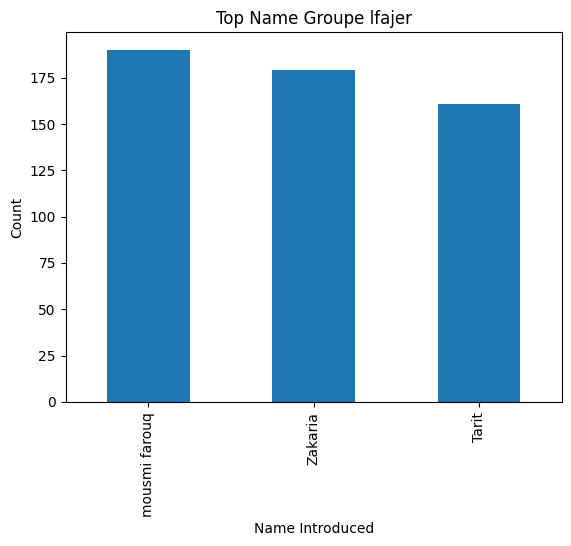

In [35]:
ax = df['Name'].value_counts().head(10).plot(kind='bar', title='Top Name Groupe lfajer')
ax.set_xlabel('Name Introduced')
ax.set_ylabel('Count')

In [ ]:
############################## Age distribution (use it only for time column)
import plotly.express as px
from datetime import date
df['Date'] = pd.to_datetime(df['Date'])
#=========================== age distribution
def calculate_age(born): 
    today = date.today() 
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['age'] = df['Date'].apply(lambda row : calculate_age(row))
fig = px.histogram(df, "age", nbins=25, title='Age distribution', width=800)
fig.show()
#=========================== month distribution
WIDTH=800
ds = df.copy()
ds['month'] = pd.to_datetime(df['Date']).dt.month
ds = ds['month'].value_counts().reset_index()
ds.columns = ['month', 'count']
fig = px.bar(ds, x='month', y="count", orientation='v', title="Rains month of the year", width=WIDTH, height=600)
fig.show()
#=========================== month vs target classification
plt.figure(figsize = (16,10))
ax = sns.countplot(data=df, x="b_month",hue=df['column_y'])  
plt.xticks(rotation=90)
plt.show  


In [ ]:
file_path = "D:\Paractical data scientist\Time seris\chat.txt"
# urllib.request.urlretrieve(url, file_path)

# read file by lines
with open(file_path, mode='r', encoding="utf8") as f:
    data = f.readlines()

dataset = data[1:]
cleaned_data = []
for line in dataset:
    # Check, whether it is a new line or not
    # If the following characters are in the line -> assumption it is NOT a new line
    if '/' in line and ':' in line and ',' in line and '-' in line:
        # grab the info and cut it out
        date = line.split(",")[0]
        line2 = line[len(date):]
        time = line2.split("-")[0][2:]
        line3 = line2[len(time):]
        name = line3.split(":")[0][4:]
        line4 = line3[len(name):]
        message = line4[6:-1] # strip newline charactor
        cleaned_data.append([date, time, name, message])

    # else, assumption -> new line. Append new line to previous 'message'
    else:
        new = cleaned_data[-1][-1] + " " + line
        cleaned_data[-1][-1] = new

# Create the DataFrame
df = pd.DataFrame(cleaned_data, columns=['Date', 'Time', 'Name', 'Message'])
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])
# ====================
rest_types_lessthan1000 = ['👍🏻', '👍🏻👍🏻','👍','🙏','🙋🏼‍♂️','🙋🏻‍♂️','🙋🏽‍♂️','🤲','🤵','✌️','💁‍♂️','💪🏻','✋','😴','😘','🙈','🤝🏻','😁','🙏🏻🙏🏻','🙋🏻‍♂️😢','✋🏽','✋🏼','☝️','✌🏽','🐫','🤲🏼🤲🏼🤲🏼🤲🏼','✋🏽✋🏽✋🏽','✋🏽✋🏽👍🏻','👍🏻🤝🏻','👳🏻‍♀️','👋','😃','😁😁😁','👏','🥰','🤔🤨','🥳']
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'OK'
    else:
        return 'NOK'
df['Message'] = df['Message'].apply(handle_rest_type)
df['Message'].value_counts()

df.drop(df[df["Message"] == "NOK"].index, inplace=True)
# print(f'{"Message" :-<40} {df["Message"].unique()}')
data = df.copy()
ds = df.copy()
# # ============================
# Set 'Date' column as the index
df.set_index('Date', inplace=True)
df['Time'].plot(figsize=(20, 6))
plt.show()
# # ============================
# df['Time'] = pd.to_datetime(df['Time']).dt.hour
# median_time = df['Time'].median()
# print(f'Median Time for Time: {median_time}')